###  Mapeo Logístico

El mapeo logístico está dado por la función
$$x_{t+1}=f(x_{t})=rx_{t}(1-x_{t}),$$
con $r\in (0,4)$ y $x_{0}\in (0,1).$

Se puede mostrar que el exponente de Lyapunov se puede escribir como
$$\lambda=\frac{1}{n}\sum_{i=0}^{n-1} ln(|f'(x_{i})|).$$

In [1]:
#Creamos un arreglo de r's
rlist=0:0.01:4
#Creamos una lista vacía donde guardaremos los exponentes de lyapunov 
llist=[]

#El siguiente for es para ir tomando los distintos elementos de rlist
for i in 1:length(rlist)
    
    xlist=zeros(10000) #Creamos una lista de x's con 10 000 ceros
    
    f(x)=rlist[i]*x*(1-x) #Definimos la función y su derivada
    df(x)=rlist[i]*(1-2*x)
    
    xlist[1]=0.06 #Escogemos una condición inicial en el intervalo(0,1)
    
    #El siguiente for es para ir llenando nuestro arreglo de x's con la relación de recurrencia
    for k in 1:length(xlist)-1
       xlist[k+1]=f(xlist[k])
    end
    
    
    #Definimos s=0, en esta variable iremos guardando la suma
    s=0
    
    #El siguiente for es para ir tomando los distintos elementos de xlist e ir sumando
    for j in 1:length(xlist)-1
        s=s+log(abs(df(xlist[j]))) #La suma es para obtener el exponente de Lyapunov
    end
    l=s/length(xlist) #Dividimos entre el número de x's, para obtener el exponente de lyapunov
    
    push!(llist,l) #Guardamos el exponente de lyapunov de la correspondiente r
end

In [2]:
using PyPlot

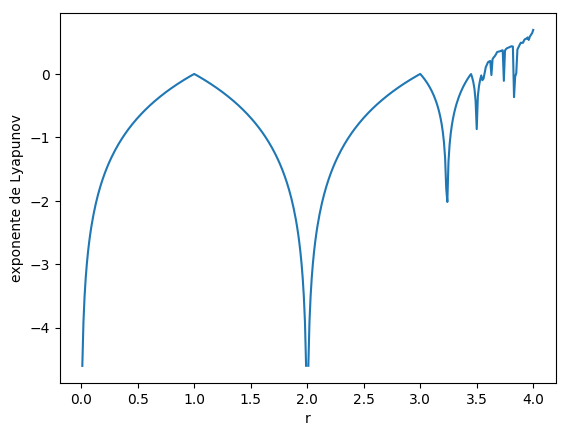

In [3]:
#Graficamos exponente de lyapunov vs r

plot(rlist, llist);
xlabel("r");
ylabel("exponente de Lyapunov");

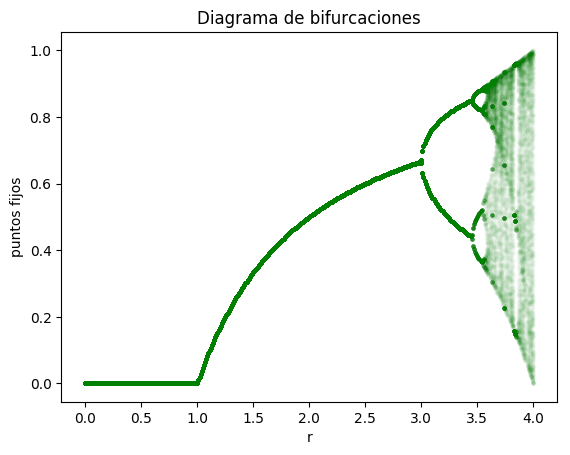

In [4]:
#El siguiente for es para ir cambiando las condiciones iniciales
for k in 1:400
    pf=[] #Creamos esta lista para ir guardando los correspondientes puntos fijos
    x0=rand() #Creamos una condición inicial aleatoria
    
    #El siguiente for es para ir tomando los distintos valores de r
    for i in 1:length(rlist)
        xlist=zeros(2000) #Creamos una lista de x's 
        f(x)=rlist[i]*x*(1-x) #Definimos la función
        xlist[1]=x0 #Agregamos la condición inicial a la lista de x's como el primer elemento
        
        #El siguiente for es para aplicar la relación de recurrencia e ir llenando xlist con los valores apropiados
        for k in 1:length(xlist)-1
           xlist[k+1]=f(xlist[k])
        end
        
        #Agregamos el último x de xlist a pf (pues asumimos que se trata de un punto fijo)
        push!(pf,xlist[length(xlist)])
    end
    
#Usamos scatter para graficar los puntos fijos vs r
    scatter(rlist,pf,marker=".",linewidth=0.01,color="green", alpha=0.02)
end

title("Diagrama de bifurcaciones")
xlabel("r");
ylabel("puntos fijos");

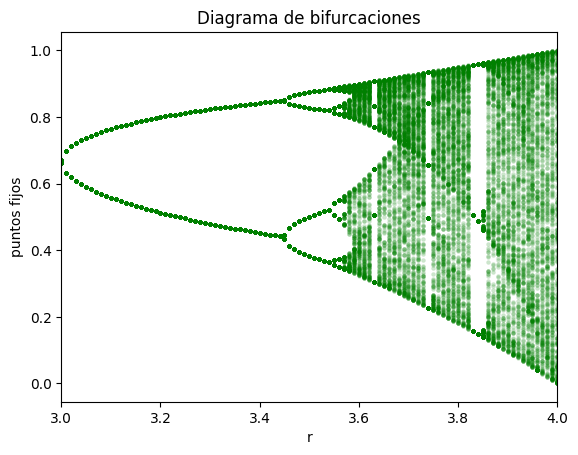

In [5]:
#Hacemos lo mismo que en la gráfica anterior, pero cambiamos los límites del eje x para apreciar mejor esa región de la gráfica
#El siguiente for es para ir cambiando las condiciones iniciales
for k in 1:400
    pf=[] #Creamos esta lista para ir guardando los correspondientes puntos fijos
    x0=rand() #Creamos una condición inicial aleatoria
    
    #El siguiente for es para ir tomando los distintos valores de r
    for i in 1:length(rlist)
        xlist=zeros(2000) #Creamos una lista de x's 
        f(x)=rlist[i]*x*(1-x) #Definimos la función
        xlist[1]=x0 #Agregamos la condición inicial a la lista de x's como el primer elemento
        
        #El siguiente for es para aplicar la relación de recurrencia e ir llenando xlist con los valores apropiados
        for k in 1:length(xlist)-1
           xlist[k+1]=f(xlist[k])
        end
        
        #Agregamos el último x de xlist a pf (pues asumimos que se trata de un punto fijo)
        push!(pf,xlist[length(xlist)])
    end
    
#Usamos scatter para graficar los puntos fijos vs r
    scatter(rlist,pf,marker=".",linewidth=0.1,color="green", alpha=0.2)
end

title("Diagrama de bifurcaciones")
xlabel("r");
ylabel("puntos fijos");
xlim(3,4);